<a href="https://colab.research.google.com/github/ROKR7381/DEMO_PURPOSE/blob/main/Bank_Original_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**---------------------------BANKING PROJECT------------------**
**-------------------Analysis by ROSHAN KUMAR----------------**

**The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.**

In [ ]:
# importing necessary library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('bank-full.csv',sep = ';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
print('number of rows and columns = ',df.shape)

number of rows and columns =  (45211, 17)


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


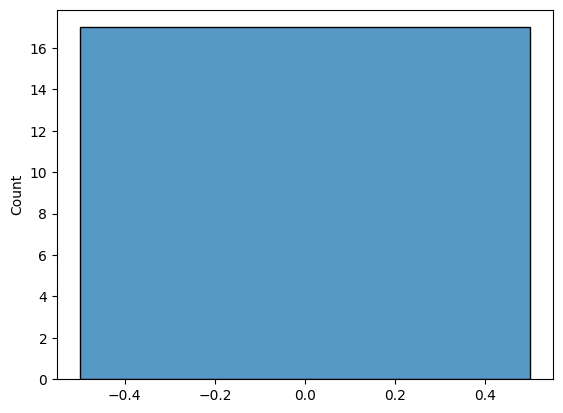

In [ ]:
#finding missing
print(df.isnull().sum())
sns.histplot(df.isnull().sum());

In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


As observed above balance ,duration, pdays, previous has sudden jump in the value from 75% to 100% which shows some anamolies.

In [ ]:
#checking datatype
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

**DATA PREPROCESSING**

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64


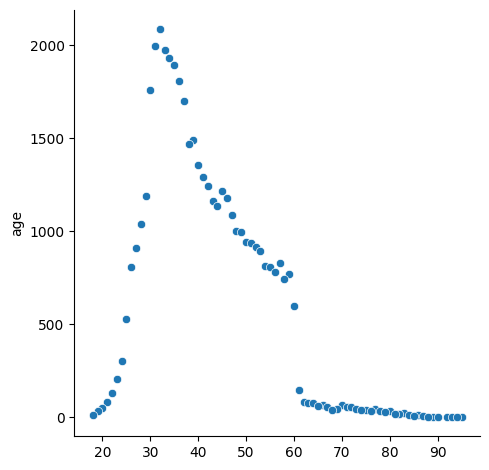

In [ ]:
sns.relplot(df.age.value_counts())
print(df.age.value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64


<Axes: >

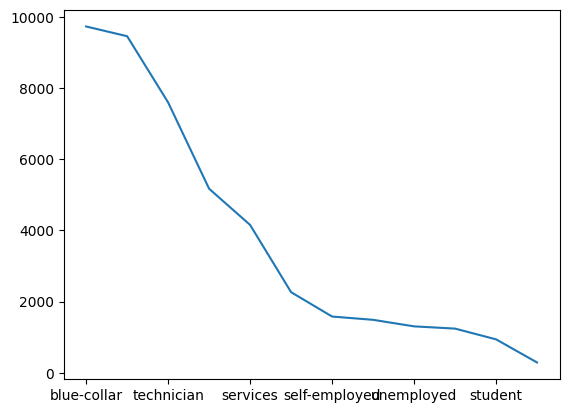

In [ ]:
print(df.job.value_counts())
df.job.value_counts().plot()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64


<Axes: xlabel='marital', ylabel='Count'>

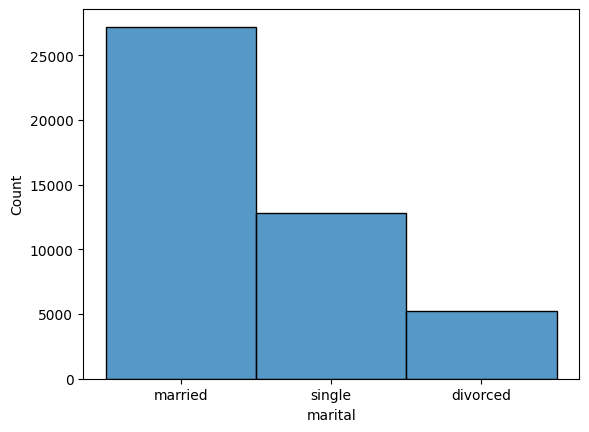

In [ ]:
print(df.marital.value_counts())
sns.histplot(df['marital'],)

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64


<Axes: xlabel='education', ylabel='Count'>

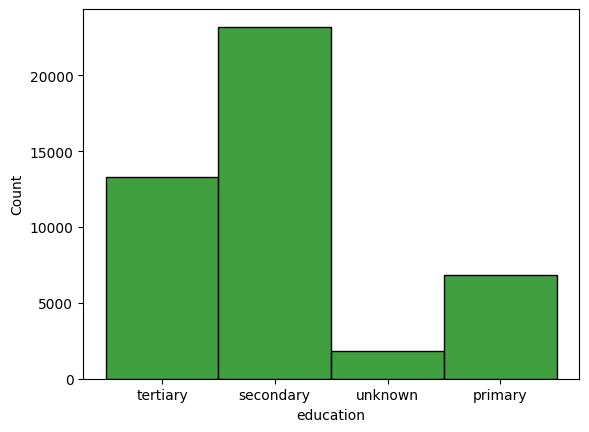

In [ ]:
print(df.education.value_counts())
sns.histplot(df['education'],color = 'green')

yes    25130
no     20081
Name: housing, dtype: int64
no     37967
yes     7244
Name: loan, dtype: int64


<Axes: xlabel='loan', ylabel='Count'>

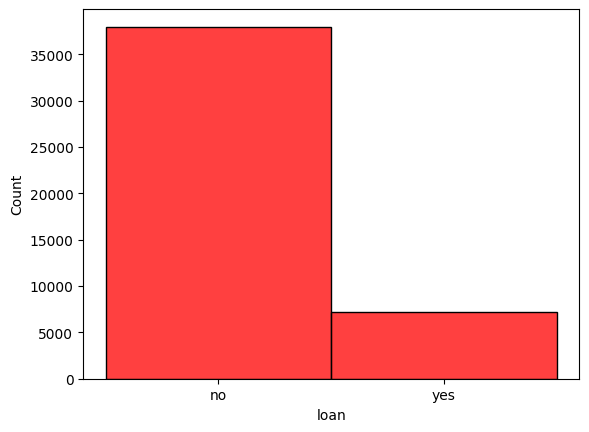

In [ ]:
print(df.housing.value_counts())
print(df.loan.value_counts())
sns.histplot(df['loan'],color = 'red')

<Axes: ylabel='campaign'>

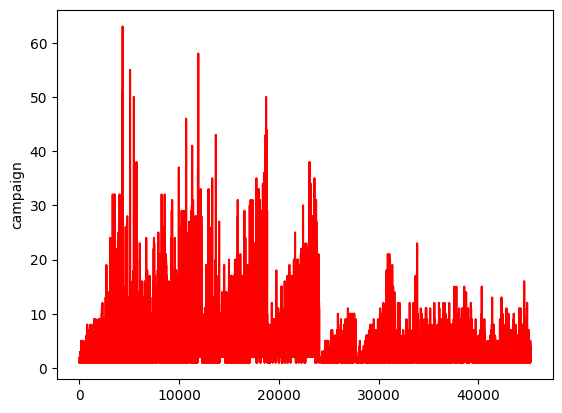

In [ ]:
sns.lineplot(df['campaign'],color = 'red')

<Axes: xlabel='poutcome', ylabel='Count'>

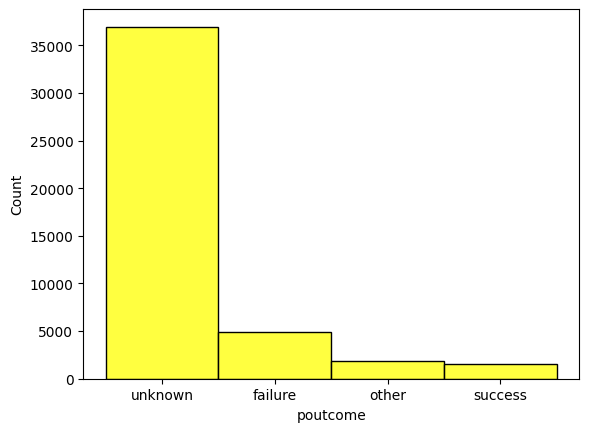

In [ ]:
df.poutcome.value_counts()
sns.histplot(df['poutcome'],color = 'yellow')

In [ ]:
df.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

Data is imbalanced so we may balance it later to get good results.

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64


<Axes: xlabel='contact', ylabel='Count'>

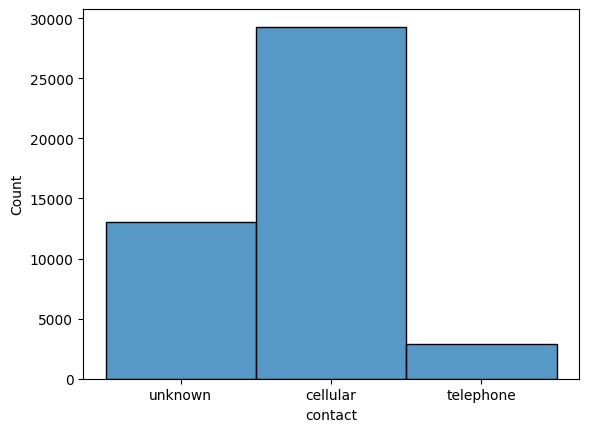

In [ ]:
print(df['contact'].value_counts())
sns.histplot(df['contact'])

**BIVARIATE ANALYSIS**

<Axes: xlabel='education', ylabel='age'>

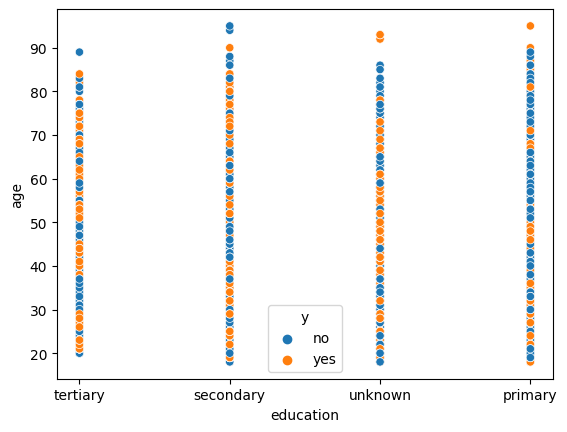

In [ ]:
sns.scatterplot(data=df, y='age', x='education',hue='y')

observation:It has been observed that term deposit subscribed by customers of higher education is comparively higher than others.Moreover term deposit by primary educated
person is very less.so bank should also focussed on that sector person to get knowledge and benefits of term deposit.

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
df[(df['default'] == 'yes') & (df['loan']=='yes') & (df['housing'] == 'yes')][['default','housing','loan','education','contact']]

,default,housing,loan,education,contact
572,yes,yes,yes,primary,unknown
852,yes,yes,yes,tertiary,unknown
932,yes,yes,yes,secondary,unknown
1197,yes,yes,yes,primary,unknown
1653,yes,yes,yes,tertiary,unknown
...,...,...,...,...,...
37255,yes,yes,yes,secondary,cellular
38119,yes,yes,yes,tertiary,cellular
38244,yes,yes,yes,secondary,cellular
39290,yes,yes,yes,secondary,cellular


In [ ]:
df[(df['default'] == 'yes') & (df['loan']=='yes') & (df['housing'] == 'yes') & (df['contact']=='unknown')][['default','housing','loan','education','contact']]

,default,housing,loan,education,contact
572,yes,yes,yes,primary,unknown
852,yes,yes,yes,tertiary,unknown
932,yes,yes,yes,secondary,unknown
1197,yes,yes,yes,primary,unknown
1653,yes,yes,yes,tertiary,unknown
1777,yes,yes,yes,secondary,unknown
1822,yes,yes,yes,secondary,unknown
1896,yes,yes,yes,tertiary,unknown
1993,yes,yes,yes,secondary,unknown
2113,yes,yes,yes,unknown,unknown


**Observation : Highly insightful data as these are the customers who has taken loan ,housing loan, and are defaulter also and has unknown number means the primary focus and investigation should be done.**

In [ ]:
df[(df['default'] == 'yes') & (df['loan']=='yes') & (df['housing'] == 'yes') & (df['contact']=='unknown')].shape[0]

52

** Total 52 such customers exists which are defaulted in every sector**

In [ ]:
df1 = df.groupby('contact')['balance'].sum().sort_values(ascending=False)
df1

contact
cellular     40938292
unknown      15409826
telephone     5241564
Name: balance, dtype: int64

Observation : Above values shows that the person having unknown phone number has huge amount of balance even more than the person having telephone.This is a check point.

In [ ]:
df.pdays.value_counts().sort_values(ascending=False).head(20)

-1      36954
 182      167
 92       147
 91       126
 183      126
 181      117
 370       99
 184       85
 364       77
 95        74
 350       73
 94        72
 175       71
 185       68
 93        65
 343       65
 188       64
 189       60
 186       60
 174       57
Name: pdays, dtype: int64

Observation : The above data reveals that 167,(right hand side) customers has not been contacted since 182 days by any bank staff and following on'

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
df[(df['pdays'] > 300) & (df['default'] == 'yes')][['contact','balance','job','pdays','default']]

,contact,balance,job,pdays,default
31562,cellular,-60,blue-collar,332,yes
32824,cellular,-274,blue-collar,329,yes
32865,cellular,879,management,344,yes
34329,cellular,-148,blue-collar,357,yes
34415,cellular,-947,blue-collar,362,yes
34767,cellular,-1083,self-employed,336,yes
34856,cellular,-18,admin.,359,yes
34979,cellular,-92,technician,363,yes
35176,cellular,87,blue-collar,345,yes
35440,cellular,-1,management,349,yes


Observation : In the above analysis it is clearly visible that above customer has cellular phone and few are in high position also but defaulter and has phones but not contacted since one year.Bank has to look after this.

In [ ]:
df['previous'].value_counts()

0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
20         8
23         8
18         6
22         6
24         5
27         5
21         4
29         4
25         4
30         3
38         2
37         2
26         2
28         2
51         1
275        1
58         1
32         1
40         1
55         1
35         1
41         1
Name: previous, dtype: int64